In [8]:
%run Algorithms.ipynb


Graph: Graph with 8 nodes and 9 edges
Minimum Vertex Cover found: {1, 2, 6, 7}


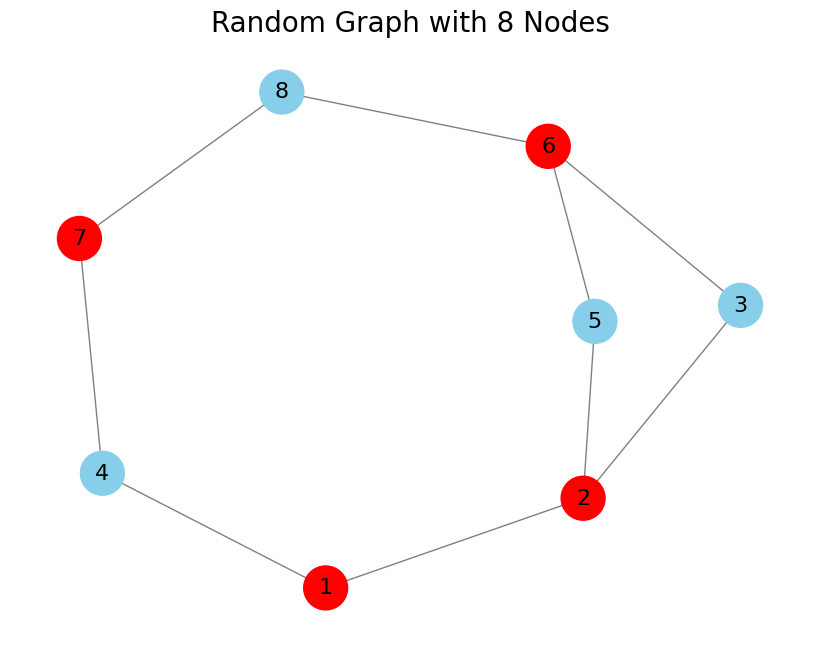

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nodes = range(1, 9)
G.add_nodes_from(nodes)

edges = [(1, 2), (1, 4), (2, 3), (2, 5), (3, 6), (4, 7), (5, 6), (6, 8), (7, 8)]
G.add_edges_from(edges)

print("Graph:", G)
vertex_cover = brute_force(G)
print("Minimum Vertex Cover found:", vertex_cover)

plt.figure(figsize=(8, 6))
node_colors = ['skyblue' if node not in vertex_cover else 'red' for node in G.nodes()]

nx.draw(G, with_labels=True, node_color=node_colors, node_size=1000, font_size=16, edge_color='gray', font_color='black')
plt.title("Random Graph with 8 Nodes", size=20)
plt.show()